In [36]:
import os
import tensorflow as tf
import numpy as np


from tensorflow.keras import layers ,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten


In [39]:
base_dir = 'F:/data'
image_size=128
batch=38

In [40]:
from tqdm import tqdm


train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.4,
    subset='training',
    batch_size=batch,
    image_size=(image_size, image_size)
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.4,
    subset='validation',
    batch_size=batch,
    image_size=(image_size, image_size)
)

Found 57255 files belonging to 5 classes.
Using 34353 files for training.
Found 57255 files belonging to 5 classes.
Using 22902 files for validation.


In [41]:
class_names = train_ds.class_names
class_names

['Bombarder', 'Divers', 'Fighter', 'Recognition', 'Transport']

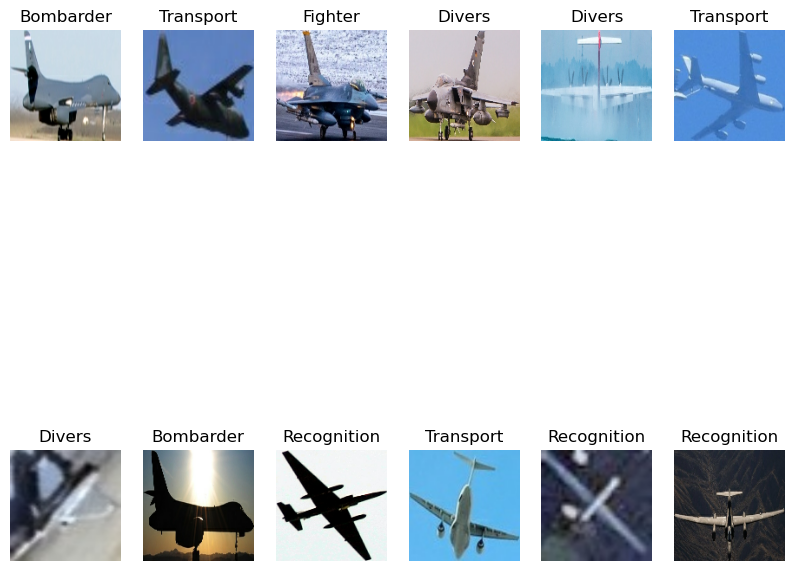

In [42]:
import matplotlib.pyplot as plt


i=0
plt.figure(figsize=(10,10))

for images , labels in train_ds.take(1):
    for i in range(12):
        plt.subplot(2,6,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [43]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape based on your image size
input_shape = (128, 128, 3)  # Assuming RGB images

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Assuming 5 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,781,509 (10.61 MB)

 Trainable params: 2,781,509 (10.61 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 347s 376ms/step - accuracy: 0.2261 - loss: 2.4143 - val_accuracy: 0.2750 - val_loss: 1.5690
Epoch 2/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 343s 378ms/step - accuracy: 0.2941 - loss: 1.5475 - val_accuracy: 0.3818 - val_loss: 1.4281
Epoch 3/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 340s 376ms/step - accuracy: 0.4144 - loss: 1.3791 - val_accuracy: 0.5374 - val_loss: 1.1655
Epoch 4/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 344s 380ms/step - accuracy: 0.5267 - loss: 1.1753 - val_accuracy: 0.6251 - val_loss: 0.9821
Epoch 5/5
905/905 ━━━━━━━━━━━━━━━━━━━━ 344s 380ms/step - accuracy: 0.6007 - loss: 1.0128 - val_accuracy: 0.7244 - val_loss: 0.7513


In [48]:
history = model.fit(train_ds, validation_data=val_ds, epochs=4)

Epoch 1/4
905/905 ━━━━━━━━━━━━━━━━━━━━ 345s 381ms/step - accuracy: 0.7096 - loss: 0.7629 - val_accuracy: 0.7719 - val_loss: 0.6370
Epoch 2/4
905/905 ━━━━━━━━━━━━━━━━━━━━ 344s 380ms/step - accuracy: 0.7762 - loss: 0.6030 - val_accuracy: 0.8194 - val_loss: 0.5233
Epoch 3/4
905/905 ━━━━━━━━━━━━━━━━━━━━ 342s 378ms/step - accuracy: 0.8196 - loss: 0.5060 - val_accuracy: 0.8543 - val_loss: 0.4468
Epoch 4/4
905/905 ━━━━━━━━━━━━━━━━━━━━ 345s 381ms/step - accuracy: 0.8487 - loss: 0.4340 - val_accuracy: 0.8670 - val_loss: 0.4057


In [49]:
history = model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
905/905 ━━━━━━━━━━━━━━━━━━━━ 341s 376ms/step - accuracy: 0.8695 - loss: 0.3702 - val_accuracy: 0.8776 - val_loss: 0.3828
Epoch 2/3
905/905 ━━━━━━━━━━━━━━━━━━━━ 343s 379ms/step - accuracy: 0.8860 - loss: 0.3249 - val_accuracy: 0.8861 - val_loss: 0.3758
Epoch 3/3
905/905 ━━━━━━━━━━━━━━━━━━━━ 387s 428ms/step - accuracy: 0.8956 - loss: 0.3066 - val_accuracy: 0.8995 - val_loss: 0.3367


In [50]:
history = model.fit(train_ds, validation_data=val_ds, epochs=1)

905/905 ━━━━━━━━━━━━━━━━━━━━ 530s 585ms/step - accuracy: 0.9064 - loss: 0.2795 - val_accuracy: 0.8977 - val_loss: 0.3471


In [21]:
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

2863/2863 ━━━━━━━━━━━━━━━━━━━━ 403s 141ms/step - accuracy: 0.9641 - loss: 0.1268 - val_accuracy: 0.8905 - val_loss: 0.8096


In [54]:
model.save("my_model.keras")